SUPERVISED LEARNING : CLASSIFICATION

Models to Explore-->Linear Regression, Ridge/Lasso, Decision Trees


In [1]:
import pandas as pd

In [37]:
df1=pd.read_csv('/Users/deha/Desktop/python/house_new.csv')

In [38]:
df1.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [39]:
df1['House_Price']=df1['House_Price'].round(2)
df1['Lot_Size']=df1['Lot_Size'].round(2)
df1.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.60,0,5,262382.85
1,4272,3,3,2016,4.75,1,6,985260.85
2,3592,1,2,2016,3.63,0,9,777977.39
3,966,1,2,1977,2.73,1,8,229698.92
4,4926,2,1,1993,4.70,0,8,1041740.86


In [40]:
df1['Rooms']=df1['Num_Bedrooms']+df1['Num_Bathrooms']
df1.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Rooms
0,1360,2,1,1981,0.60,0,5,262382.85,3
1,4272,3,3,2016,4.75,1,6,985260.85,6
2,3592,1,2,2016,3.63,0,9,777977.39,3
3,966,1,2,1977,2.73,1,8,229698.92,3
4,4926,2,1,1993,4.70,0,8,1041740.86,3


In [41]:
import datetime
cur=datetime.datetime.now()
yr=cur.year

In [42]:
df1['Years']=yr-df1['Year_Built']
df1.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Rooms,Years
0,1360,2,1,1981,0.60,0,5,262382.85,3,44
1,4272,3,3,2016,4.75,1,6,985260.85,6,9
2,3592,1,2,2016,3.63,0,9,777977.39,3,9
3,966,1,2,1977,2.73,1,8,229698.92,3,48
4,4926,2,1,1993,4.70,0,8,1041740.86,3,32


In [43]:
df1.drop(['Num_Bedrooms','Num_Bathrooms','Year_Built'],axis=1,inplace=True)
df1.head()

,Square_Footage,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Rooms,Years
0,1360,0.60,0,5,262382.85,3,44
1,4272,4.75,1,6,985260.85,6,9
2,3592,3.63,0,9,777977.39,3,9
3,966,2.73,1,8,229698.92,3,48
4,4926,4.70,0,8,1041740.86,3,32


<Axes: >

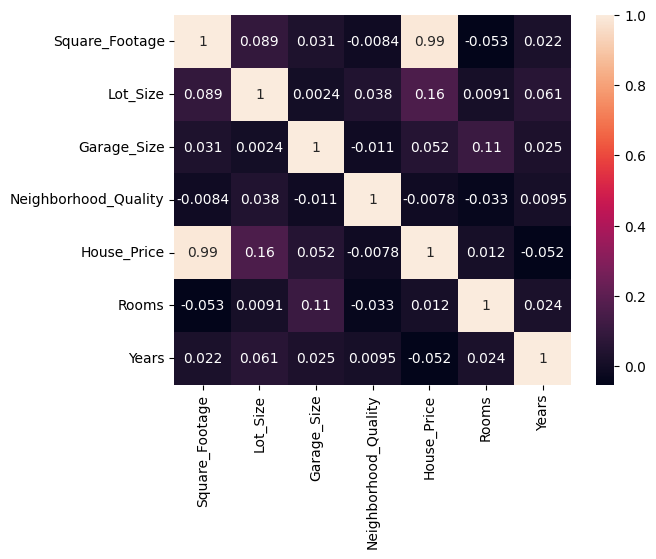

In [44]:
sns.heatmap(df1.corr(),annot=True)

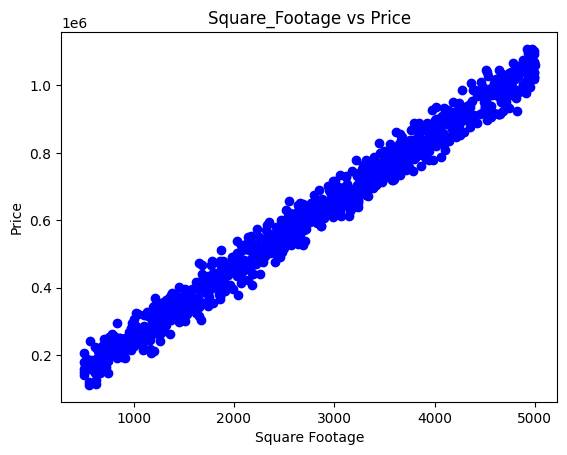

In [45]:
plt.scatter(df1['Square_Footage'],df1['House_Price'],color='b')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Square_Footage vs Price')
plt.show()

Text(0.5, 1.0, 'Rooms distribution')

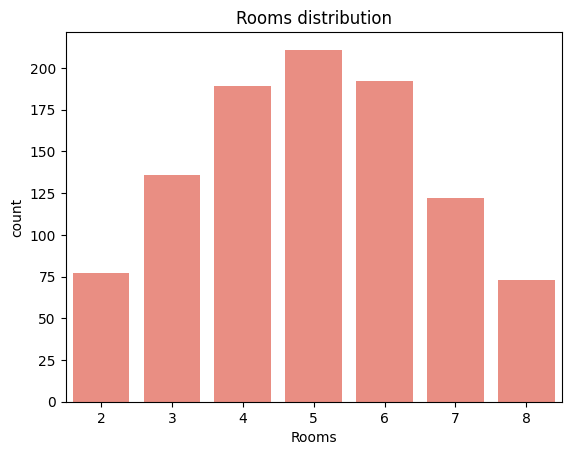

In [46]:
rooms=df1['Rooms'].value_counts().sort_index(ascending=True)
sns.barplot(rooms,color='salmon')
plt.title('Rooms distribution')

Text(0.5, 1.0, 'Years distribution')

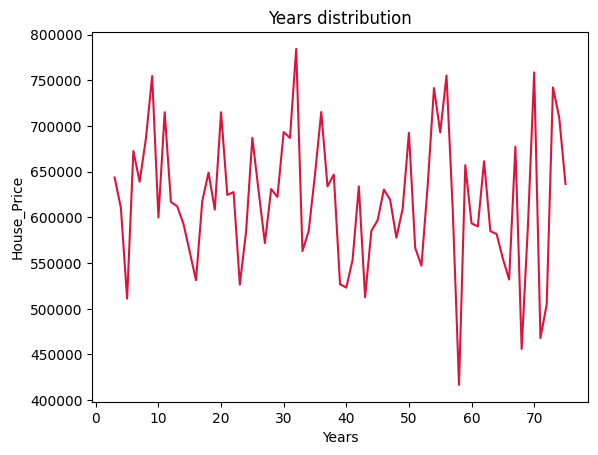

In [47]:
years_by_price=df1.groupby('Years')['House_Price'].mean().sort_index()
sns.lineplot(years_by_price,color='crimson')
plt.title('Years distribution')

In [48]:
df1.head()

,Square_Footage,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Rooms,Years
0,1360,0.60,0,5,262382.85,3,44
1,4272,4.75,1,6,985260.85,6,9
2,3592,3.63,0,9,777977.39,3,9
3,966,2.73,1,8,229698.92,3,48
4,4926,4.70,0,8,1041740.86,3,32


In [49]:
df1.columns

Index(['Square_Footage', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality',
       'House_Price', 'Rooms', 'Years'],
      dtype='object')

In [50]:
y=np.log1p(df1['House_Price'])

In [51]:
y.head()

0    12.477564
1    13.800663
2    13.564454
3    12.344529
4    13.856405
Name: House_Price, dtype: float64

In [52]:
x=df1.drop(['House_Price'],axis=1)
x.head()

,Square_Footage,Lot_Size,Garage_Size,Neighborhood_Quality,Rooms,Years
0,1360,0.60,0,5,3,44
1,4272,4.75,1,6,6,9
2,3592,3.63,0,9,3,9
3,966,2.73,1,8,3,48
4,4926,4.70,0,8,3,32


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

In [56]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(alpha=1.0),
    'Lasso':Lasso(alpha=0.1),
    'Decision Tree Regressor':DecisionTreeRegressor(max_depth=5),
    'RandomForestRegressor':RandomForestRegressor(),
    'Support Vector Regressor':SVR(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()
}

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [58]:
for name,model in models.items():
    print(f"==================={name}================")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2_sc=r2_score(y_test,y_pred)
    print(f"Mean Squared Error:{mse:.2f}")
    print(f"Mean Absolute Error:{mae:.2f}")
    print(f"R2 Score:{r2_sc:.2f}")

===================Linear Regression================
Mean Squared Error:0.01
Mean Absolute Error:0.09
R2 Score:0.95
===================Ridge================
Mean Squared Error:0.01
Mean Absolute Error:0.09
R2 Score:0.95
===================Lasso================
Mean Squared Error:0.01
Mean Absolute Error:0.09
R2 Score:0.94
===================Decision Tree Regressor================
Mean Squared Error:0.01
Mean Absolute Error:0.06
R2 Score:0.97
===================RandomForestRegressor================
Mean Squared Error:0.00
Mean Absolute Error:0.03
R2 Score:0.99
===================Support Vector Regressor================
Mean Squared Error:0.01
Mean Absolute Error:0.06
R2 Score:0.98
===================GradientBoostingRegressor================
Mean Squared Error:0.00
Mean Absolute Error:0.02
R2 Score:1.00
===================AdaBoostRegressor================
Mean Squared Error:0.00
Mean Absolute Error:0.05
R2 Score:0.98
